In [146]:
!pip install otter-grader==1.1.6

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/hw/hw07

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITEC419-fa22/hw/hw07


In [147]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 7: Sample Sizes and Confidence Intervals

본 자료는 UC Berkeley의 Data 8의 HW09를 수정한 것입니다. (*This document is a modified version of HW09 at Data 8 of UC Berkeley.*)

각 제공된 셀을 채워서 숙제를 완성하기 바랍니다. 항상 테스트할 때는 위의 셀들을 모두 실행하여 미리 제공된 테스트 데이터를 로드한 이후에 진행하기 바랍니다.

**도움이 되는 자료**:
- [Python Reference](http://data8.org/sp22/python-reference.html): Data 8에서 사용되는 배열과 테이블 메소드들의 요약자료!

**교재의 관련 자료**: 

* [Estimation](https://inferentialthinking.com/chapters/13/Estimation.html)
* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

여러분은 모든 문제에 대해서는 적절한 위치에 설명과 답변을 제시해야 합니다. **본 숙제에서 제공되는 셀에서 정의한 변수들은 절때 값을 변경하면 안됩니다.** 예를 들어, `max_temperature`에 대한 값을 구해야 할 경우에, 해당 질문에 제대로 답을 구했더라도 추후에 이 변수를 수정하면 검사에서 틀린 것으로 체크될 것입니다.

**숙제 기한:**

이 숙제의 기한은 11월 15일(화) 밤 11시 59분까지입니다. 11월 12일(토) 밤 11시 59분 이전에 제출할 경우에는 5점의 가점이 부여됩니다. **기한이 지난 이후에는 받지 않습니다.**

**Note:** 이 숙제에는 숨어있는 검사가 있습니다. 이는 모든 검사에서 통과되었더라도 최종 점수가 100%라는 것을 의미하지 않는다는 것입니다. 여러분이 제출한 숙제에 대하여 정답인지를 확인하기 위해서 추가적인 데이터로 검사를 진행합니다.

여러분의 답을 다른 학생과 직접적으로 공유하는 것은 허용하지 않습니다. 다만, 조교와 혹은 다른 학생들과 문제에 대하여 논의하는 것은 장려합니다. 서로 협력한 부분에 대해서는 해당 부분에 꼭 명기를 하기 바랍니다.

모든 숙제는 최대한 빠른 시일내에 시작해야 문제가 봉착되었을 때 도움을 받을 수 있는 충분한 시간을 확보할 수 있을 것입니다. 모든 질의는 LMS 시스템의 문의 게시판을 이용하고 개인적인 이메일에는 대응하지 않습니다.

In [148]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Bounding the Tail of a Distribution

어떤 모임의 평균 나이는 45세이고, 표준편차는 5세입니다.

아래의 각 부분에서 **추가적인 가정없이** 문장이 참이되도록 빈칸을 채우고, 답을 설명하시오.

*Note:* "최소 0%" 혹은 "최대 100%"와 같은 느슨한 답변에는 점수가 없습니다. 주어진 정보로 최선의 답변을 작성하시오.

<!-- BEGIN QUESTION -->

**Question 1.1.** 모임에 참여하는 사람들 25세에서 65세 사이는 최소 ________%이다. **(6 Points)**

<!--
BEGIN QUESTION
name: q1_1
manual: true
-->

P(25<x<65)=P(45-45<x<45+45)
평균:45, 표준편차:5


 Chebyshev' inequality -> 해당 구간에서 최소 1-1/4^2=15/16 만큼 사람이 존재함. 
 (15/16)*100 = 93.75
 이므로 최소 93.75% 존재함. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.2.** 모임에 소속된 사람 중 24세 이하이거나 66세 이상, 즉 25세에서 65세 구간에 속하지 않는 사람은 최대 _______%이다. **(6 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: true
-->

위에서 서술한 대로 25세~65세 구간의 비율은 93.75% 이고, 따라서 나머지 구간에 최대 6.25% 만큼의 사람이 존재한다. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3.** 65세 이상은 최대 _______%이다. **(6 Points)**

*Hint:* 잘 모르겠으면, 이 경우가 어떤 분포인지를 생각해보기 바랍니다.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->

3.125이다. 이 경우는 정규분포를 따른다. 위에서 구한 값들을 토대로 추론해 보면 25세 보다 작고 65세보다 큰 경우가 6.25% 이므로, 6.25에 1/2 를 곱한 값인 3.125 이다. 



<!-- END QUESTION -->



## 2. Sample Size and Confidence Level

경북대학교 컴퓨터학부의 재학생의 몇 퍼센트가 페이스북을 사용하고 있는지를 추정하고자 합니다. 이를 위해 무작위로 학생들의 표본을 추출할 필요가 있습니다. 표본 추출 방법은 재학생들을 대체하면서(with replacement) 무작위로 선발한다고 가정합니다.

***이 부분을 보기 전에 교재의 [14.6절](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#)을 먼저 살펴보기 바랍니다. 그렇게 하면 여러분의 일이 훨씬 더 빨리 진행될 것입니다!***

**Question 2.1.** 모수(parameter)에 대한 **95%** 신뢰구간의 폭이 왼쪽 끝에서 오른쪽 끝까지 6% 이하가 되도록 표본(sample) 추출해야 하는 최소 학생 수에 `smallest`에 저장하십시오. **(6 points)**

*Hint:* 표본(sample)에 있는 학생이 페이스북 사용자인지 확인하기 위해 우리의 데이터가 어떻게 표현될 수 있습니까? 이러한 점을 감안할 때, 모집단(population)의 SD에 대해 어떤 가정을 할 수 있을까요?
[14.6절](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#)이 도움이 될 것입니다!

*Note:* 최소 표본 크기는 정수여야 합니다.

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 6
-->

In [149]:
smallest =( 4*0.5/0.06)**2
smallest

1111.1111111111113

In [150]:
grader.check("q2_1")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 2.2.** 95% 신뢰 구간이 아닌 90% 신뢰 구간을 구성하기로 결정했지만, 여전히 구간의 폭이 왼쪽 끝에서 오른쪽 끝까지 6% 이하이어야 한다고 가정합니다. 이때 Question 2.1과 같은 크기의 표본(sample)이 필요할까요? 다음 중 정답을 고르고, 계산하지 않고 더 자세히 설명하시오. **(6 Points)**

1. 예, 같은 크기의 표본을 사용해야 합니다.
2. 아니오, 더 작은 크기의 표본으로 얻을 수 있습니다.
3. 아니오, 더 큰 크기의 표본이 필요합니다.

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

 표본 크기의 최소값을 구하는 식: (교재 14.6 에서 참고) sqrt(sample size)>=(4*SD of the 0-1 poopulation/0.01)

 답은 2번이다. 90% 신뢰구간이 95% 신뢰구간 보다 더 짧고, 집약도가 높다. 따라서 분산 및 표준 편차의 크기도 커진다.
 
신뢰구간 90% 와 95% 일때 최소 sample size를 구하는 식에 있어서 차이가 있는 부분은 SD of 0/1 population 뿐이므로, SD가 작은 90% 신뢰구간일때의 최소표본 크기가 더 작다.
 



<!-- END QUESTION -->

**Question 2.3.** 데이터과학기초 교수는 모수(parameter)에 대한 90% 신뢰 구간은 95% 신뢰 구간과 동일한 과정을 수행하지만, 추정치의 양쪽에 2개의 SD (±2)가 아닌 1.65 SD (±1.65)이면 된다고 학생들이게 이야기합니다. 표본 추출해야 하는 최소 학생 수를 'smallest_num'에 저장하고 모수에 대한 **90%** 신뢰 구간의 너비가 왼쪽 끝에서 오른쪽 끝까지 6% 이하가 되도록 합니다. **(6 points)**

*Note:* 최소 표본 크기는 정수이어야 합니다.

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 6
-->

In [151]:
smallest_num = (4*(1.65/2)*0.5/0.06)**2
smallest_num

756.25

In [152]:
grader.check("q2_3")

All tests passed!

다음 문제는 교재의 [14.3.4절](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf)에 비슷한 예제가 있으니 참조하기 바랍니다.

학생들은 교수가 Question 2.3에서 1.65라는 값을 어떻게 생각해냈는지 궁금해하였고, 그는 다음의 두 코드셀을 실행했다고 말하였습니다. 첫번째는 `datascience` 라이브러리 함수인 `plot_normal_cdf`를 호출하여 수평축의 표준단위(standard units)로 표시된 정규 곡선(the normal curve) 하에서 최대 지정된 수의 SD가 평균보다 높은 비율을 화면에 출력합니다. 관련 설명서는 [여기](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf)에서 볼 수 있습니다.

*Note:* `cdf`는 `cumulative distribution function`, 즉 누적분포함수의 약자입니다. 이는 확률 히스토그램에서 지정된 점의 왼쪽에 대한 비율을 측정합니다.

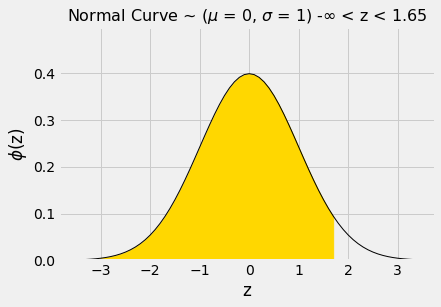

In [153]:
plot_normal_cdf(1.65)

두 번째 셀을 실행하기 위해, 교수는 우선 확률과 통계에 관한 파이썬 라이브러리를 먼저 import하였습니다.

In [154]:
# Just run this cell
from scipy import stats

그 다음은 라이브리에서 `norm.cdf` 메소드를 사용하여 위의 황금비율을 구했습니다.

In [155]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

*Note*: 여러분이 `scipy` 라이브러리를 어떻게 사용하는지 그 메소드는 어떻게 사용하는지 직접 이해할 필요는 없습니다.

<!-- BEGIN QUESTION -->

**Question 2.4.** 이는 정규분포에서 평균보다 최대 1.65 SD인 범위의 백분율이 약 **95%**인 것을 보여줍니다. **90%** 신뢰구간을 구성할 때 1.65가 올바른 SD 개수인 이유를 설명하시오. **(6 Points)**

<!--
BEGIN QUESTION
name: q2_4
manual: true
-->

위의 c.d.f 그림에서 확인한대로 1.65sd 범위까지의 백분율이 95% 이므로, upper bound 이상은 5%만큼의 부분이 남는다. 90% 신뢰구간은 전체에서 양끝으로 upper, lower bound 를 5% 씩 제외시키도록 설정하면 되므로, 백분율 95% 에서 확인한 것 처럼 1.65sd로 가정한다면 90% 신뢰구간을 구성할때 올바른 sd 개수가 된다. 

<!-- END QUESTION -->

In [156]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.99009692444083575

**Question 2.5.** 위의 셀은 정규분포에서 평균보다 최대 2.33 SD 인 비율이 99%임을 나타냅니다. 빈칸에 맞는 답을 `option`에 저장하시오: **(6 points)**

평균 추정치에서부터 양쪽 방향으로 2.33 SD만큼 이동하면 모수(parameter)에 대한 _______% 신뢰구간을 얻을 수 있습니다.

1. 99.5
2. 99
3. 98.5
4. 98

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 6
-->


In [157]:
option = 4
option

4

In [158]:
grader.check("q2_5")

All tests passed!

## 3. Polling and the Normal Distribution

혜린은 통계 컨설턴트이며, 지하철 5호선 신설 발의안을 지지하는 모임에서 일하고 있습니다. 그들은 얼마나 많은 대구시민들이 이 발의안에 찬성을 할지 알고 싶어합니다.

혜린은 모든 대구시민 유권자들의 균일한 무작위(random) 표본(sample)을 조사하여, 400명의 투표자 중 210명이 그 제안에 찬성할 것이라는 것을 알게되었습니다. 아래에는 세 개의 열로 구성된 테이블을 제공합니다. 처음 두 열은 `sample`과 동일하고, 세 번째 열에는 각 옵션을 선택한 전체 유권자의 비율이 포함됩니다.

In [159]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


**Question 3.1.** 혜린은 10,000개의 부트스트랩 재샘플(bootstrap resample)을 사용하여 찬성에 투표할 모든 대구시민 유권자의 비율에 대한 신뢰구간을 계산하려고 합니다.

다음 셀을 채워 찬성 비율의 경험적 분포를 시뮬레이션하시오.
부트스트랩 재샘플링을 사용하여 10,000개의 선거 결과를 시뮬레이션하고 각 부트스트랩 재샘플의 Yes 비율을 포함하도록 `resample_yes_proportions`를 정의합니다. 그런 다음 히스토그램으로 `resample_yes_proportions`를 시각화합니다. **원래 표본의 찬성 비율 근처에서 중심점을 이루는 종 모양의 곡선이 나타납니다.** **(6 points)**

*Hint:* 여기서 `sample_proportions`이 유용하게 사용될 것입니다!

<!--
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 1
 - 5
-->

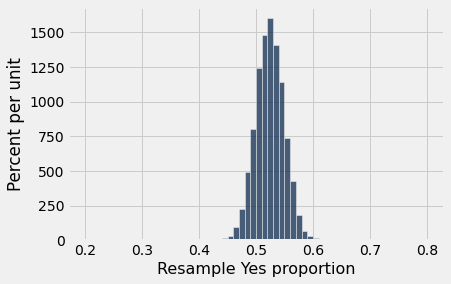

In [160]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(sample_size, sample_with_proportions.column('Proportion'))
    x=resample.item(0)
    resample_yes_proportions = np.append(resample_yes_proportions,x)
    
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [161]:
grader.check("q3_1")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 3.2.** 왜 이러한 상황에서 중심 극한 정리 (Central Limit Theorem; CLT)가 적용되는지, 그리고 우리가 위에서 보는 분포를 어떻게 설명할 것인가? **(6 points)**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

* CLT는 표본이 추출된 모집단의 분포와는 관계없이, 추출된 대규모의 bootstrap resample의 합계 또는 평균의 확률 분포가 대략 정규화될 것이라는 정리이다.
* 10000개라는 대규모의 표본이 있는 상태이므로 CLT를 적용할 수 있다.
* 표본의 크기가 10000개인 위의 히스토그램을 보면 Yes의 비율인 0.525에 아주 밀집되어있다. 
* 이 상태에서 표본의 크기를 늘린다면 0.525에 더 밀집되어 표본 비율의 변동성이 감소할 것이고, 표본의 크기를 줄인다면 0.525에 덜 밀집되어 표본 비율의 변동성이 증가할 것이다.

<!-- END QUESTION -->


0과 1로 구성된 모집단에서는 **모집단의 표준편차**에 대한 간단한 공식이 있으며, 다음과 같다:

$$\text{모집단의 표준편차} = \sqrt{(\text{0의 비율}) \times (\text{1의 비율})}$$

(표준편차의 정의로부터 시작해서 이 공식을 알아내는 것은 대수를 즐기는 사람들에게는 재미있는 연습이 될 것이다.)

**Question 3.3.** 단지 중심 극한 정리 (CLT)와 400개의 표본에서 Yes 와 No 유권자의 수만을 사용하여 *대수적으로* `resample_yes_proportions` 배열의 에측 표준편차를 계산하시오. 그리고 이 값을 `approximate_sd`에 저장하시오. **어떠한 식으로든 `resample_yes_proportions`에 있는 데이터는 접근하지 마시오.** **(6 points)**

표본(sample) 평균의 표준편차는 모집단 SD와 표본의 크기로부터 계산할 수 있습니다. (위의 공식이 도움이 될 것입니다.)
만약 모집단 SD를 모를 경우에는 표본 SD를 합리적인 근사치로 사용할 수 있습니다. 교재의 [이 절](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means)이 도움이 될 것입니다.

<!--
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 6
-->

In [162]:
Yes = sample_with_proportions.where('Vote', are.equal_to('Yes')).column('Proportion').item(0)
No = sample_with_proportions.where('Vote', are.equal_to('No')).column('Proportion').item(0) 
approx_pop_sd = (Yes * No)**(1/2)
approximate_sd = approx_pop_sd / 400**(1/2)
approximate_sd

0.024968730444297725

In [163]:
grader.check("q3_3")

All tests passed!

**Question 3.4.** 가능한 표본 비율의 실제 SD에 대한 근사치로 작용하는 `resample_yes_proportions`의 표준편차를 계산하시오. 이렇게 하면 Question 3.3에 대한 답변이 대략 맞는지 확인하는데 도움이 됩니다. **(6 points)**

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 6
-->

In [164]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.024843282581766452

In [165]:
grader.check("q3_4")

All tests passed!

**Question 3.5.** **다시 어떠한 식으로든 `resample_yes_proportions`을 접근하지 않고**
대구시민의 Yes 유권자 비율에 대한 95% 신뢰구간을 계산하시오. **(6 points)**

아래 셀은 `resample_yes_proportions`의 히스토그램 아래에 빨간색 막대로 그 구간을 그립니다; 이 막대를 사용하여 여러분의 답이 맞는지를 확인합니다.

*Hint:* CLT에 의해 얼마나 많은 SD가 분포의 95%에 해당할까요? 교재의 [이곳](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)에 있는 토론을 떠올려보시오.

*Hint:* 앞서 정의한 `approximate_sd` 변수가 도움이 될 것입니다!

<!--
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 3
 - 3
-->

In [166]:
mean = sample_with_proportions.where('Vote', are.equal_to('Yes')).column('Proportion').item(0)
lower_limit = mean - 2 * approximate_sd 
upper_limit = mean + 2 * approximate_sd 
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [167]:
grader.check("q3_5")

All tests passed!

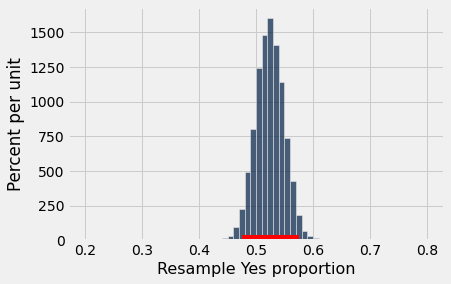

In [168]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

신뢰 구간은 숫자 0.5와 겹쳐져야 합니다. 그것은 비록 표본의 찬성 비율이 0.5를 약간 넘더라도, 지하철 5호선 신설 발의안이 승리하고 있는지 확신할 수는 없다는 것을 의미합니다.

지하철 신설 발의안의 찬성 캠패인은 그들이 이기고 있는지를 알 필요가 있습니다. 전체 모집단을 조사하지 않고는 절대 확신할 수는 없지만, 표본 평균의 표준 편차가 0.005에 불과하다면 괜찮을 것입니다. 그들은 혜린에게 그것을 달성할 수 있을 만큼 충분히 큰 표본 크기로 새로운 여론조사를 실시하도록 요청하였습니다. (여론조사 비용이 많이 들기 때문에 표본이 필요이상으로 커서는 안됩니다.) 

혜린은 교과서 14장을 참조합니다. 그녀는 모집단 표준 편차가 0.5(찬성을 1, 반대를 0으로 코딩함)라고 보수적으로 가정하는 대신, 표본 표준 편차와 같다고 가정하기로 결정하였습니다.

$$\sqrt{(\text{표본에서의 찬성 비율}) \times (\text{표본에서의 반대 비율})}.$$

그 가정하에서, 혜린은 9,975개의 표본으로 충분하다고 결정합니다.

**Question 3.6.** 혜린이 결정한 표본 크기로 표본 평균의 원하는 표준 편차를 얻을 수 있습니까? 더 작은 표본 크기로 어떤 SD를 얻을 수 있습니까? 혹은 더 큰 표본 크기로는요?

이를 조사해보기 위해서 먼저 혜린의 표본 크기를 사용하여 얻은 표본 평균의 SD를 계산하십시오. **(6 points)**

<!--
BEGIN QUESTION
name: q3_6
manual: false
points:
 - 0
 - 2
 - 2
 - 2
-->

In [169]:
estimated_population_sd = np.sqrt(0.525*(1-0.525))
hyerin_sample_size = 9975
hyerin_sample_mean_sd = estimated_population_sd / np.sqrt(hyerin_sample_size)
print("With Hyerin's sample size, you would predict a sample mean SD of %f." % hyerin_sample_mean_sd)

With Hyerin's sample size, you would predict a sample mean SD of 0.005000.


In [170]:
grader.check("q3_6")

All tests passed!

**Question 3.7.** 다음으로 더 작은 표본 크기로부터 얻을 수 있는 표본 평균의 SD를 계산합니다. 이상적으로는 상당히 작은 숫자를 선택해야 하지만, 혜린의 표본 크기보다 작은 어떠한 표본크기도 선택할 수 있습니다. **(5 points)**

<!--
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 1
 - 4
-->

In [171]:
smaller_sample_size = 1004 
smaller_sample_mean_sd = estimated_population_sd / np.sqrt(smaller_sample_size)
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.015760


In [172]:
grader.check("q3_7")

All tests passed!

**Question 3.8.** 마지막으로 더 큰 표본 크기로부터 얻을 수 있는 표본 평균의 SD를 계산합니다. 여기서, 훨씬 큰 숫자는 더 분명하게 만들 수 있지만, 혜린의 표본 크기보다 큰 어떠한 표본크기도 선택할 수 있습니다. **(5 points)**


<!--
BEGIN QUESTION
name: q3_8
manual: false
points:
 - 1
 - 4
-->

In [173]:
larger_sample_size = 200000 
larger_sample_mean_sd = estimated_population_sd / np.sqrt(larger_sample_size)
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.001117


In [174]:
grader.check("q3_8")

All tests passed!

**Question 3.9.** 이를 바탕으로 표본 SD가 모집단 SD와 같다는 혜린의 가정하에 표본 크기는 최소로 충분한 표본이었다고 할 수 있는가? 만약 9,975가 실제로 최소 충분 표본(minimum sufficient sample)일 경우 `min_sufficient`에 `True`를, 그렇지 않을 경우 `False`를 할당합니다. **(4 points)**

<!--
BEGIN QUESTION
name: q3_9
manual: false
points:
 - 0
 - 4
-->

In [175]:
min_sufficient = False
min_sufficient

False

In [176]:
grader.check("q3_9")

All tests passed!

숙제 07이 완성되었습니다.!

**중요한 숙제 제출 단계:**
1. 테스트를 실행하고 모두 통과했는지 확인합니다.
2. **File** 메뉴에서 **Save and pin revision**을 선택한 다음 **마지막 셀을 실행**합니다.
3. 링크를 클릭하여 zip 파일을 다운로드합니다.
4. LMS를 통해 숙제를 제출합니다. 만약 여러번 제출할 경우에는 마지막으로 제출된 것만을 고려할 것입니다.


---

다시한번 체크하기 위해서 아래의 셀을 통해 자동채점 테스트를 모두 한번 더 실행합니다.

In [177]:
grader.check_all()

q2_1:

    All tests passed!
    

q2_3:

    All tests passed!
    

q2_5:

    All tests passed!
    

q3_1:

    All tests passed!
    

q3_3:

    All tests passed!
    

q3_4:

    All tests passed!
    

q3_5:

    All tests passed!
    

q3_6:

    All tests passed!
    

q3_7:

    All tests passed!
    

q3_8:

    All tests passed!
    

q3_9:

    All tests passed!

## Submission

아래 셀을 실행하기 전에 노트북의 모든 셀을 순서대로 실행했는지 확인하여 모든 이미지/그래프가 출력에 나타나도록 하십시오. 아래 셀은 제출할 zip 파일을 생성합니다. **내보내기 전에 저장하십시오!**

In [178]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

구글 코랩에서 grader 현재 버전은 위의 zip 파일 링크가 작동되지 않고, 현재 디렉토리(구글 드라이브의 .../hw/hw07/) 내에 hw07.zip으로 저장되어 있습니다. 따라서 해당 zip 파일을 LMS에 제출하면 됩니다. 